# VGG

In [6]:
#import the required Libraries

import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [2]:
#Links to the image dataset and the metadata csv

img_link ='dataverse_files/HAM10000_images'
csv_link = 'dataverse_files/HAM10000_metadata.csv'

In [5]:
# load, resize and process images  and map the class labels from metadata

metadata = pd.read_csv(csv_link)
labels = metadata['dx']

images = []
for img_id in metadata['image_id']:
    img_path = os.path.join(img_link, img_id+'.jpg')
    image = cv2.imread(img_path)
    image = cv2.resize(image, (128, 128))
    images.append(image)
X = np.array(images)
y = to_categorical(labels.factorize()[0], num_classes=7)

In [7]:
#split train and test data to 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
#Model architecture for VGG model with defined input shapes 

model = Sequential()
model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


In [12]:
#compile model and configure Early stopping
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)


In [15]:
#fit and train model for 50 epochs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

model.save('vgg_model.h5')

Epoch 1/10
251/251 [==============================] - 1040s 4s/step - loss: 1.1579 - accuracy: 0.6699 - val_loss: 1.1393 - val_accuracy: 0.6680
Epoch 2/10
251/251 [==============================] - 1033s 4s/step - loss: 1.3412 - accuracy: 0.6596 - val_loss: 1.1401 - val_accuracy: 0.6680
Epoch 3/10
251/251 [==============================] - 1035s 4s/step - loss: 1.1543 - accuracy: 0.6696 - val_loss: 1.1375 - val_accuracy: 0.6680
Epoch 4/10
251/251 [==============================] - 1035s 4s/step - loss: 1.1440 - accuracy: 0.6699 - val_loss: 1.1353 - val_accuracy: 0.6680
Epoch 5/10
251/251 [==============================] - 1034s 4s/step - loss: 1.1396 - accuracy: 0.6699 - val_loss: 1.1332 - val_accuracy: 0.6680
Epoch 6/10
251/251 [==============================] - 1032s 4s/step - loss: 1.1413 - accuracy: 0.6699 - val_loss: 1.1331 - val_accuracy: 0.6680
Epoch 7/10
251/251 [==============================] - 1031s 4s/step - loss: 1.1405 - accuracy: 0.6699 - val_loss: 1.1331 - val_accuracy:

In [16]:
#calculate accuracy, F-1 score, Precision, Recall and confusion Matrix

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_true, y_pred)
print('Test accuracy:', accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Confusion matrix:', confusion_mat)

63/63 [==============================] - 46s 726ms/step
Test accuracy: 0.6679980158805847
F1 score: 0.535038208924267
Precision: 0.446221332005985
Recall: 0.6679980029955067
Confusion matrix: [[   0  228    0    0    0    0    0]
 [   0 1338    0    0    0    0    0]
 [   0   28    0    0    0    0    0]
 [   0  226    0    0    0    0    0]
 [   0   21    0    0    0    0    0]
 [   0   93    0    0    0    0    0]
 [   0   69    0    0    0    0    0]]


C:\Users\nprav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


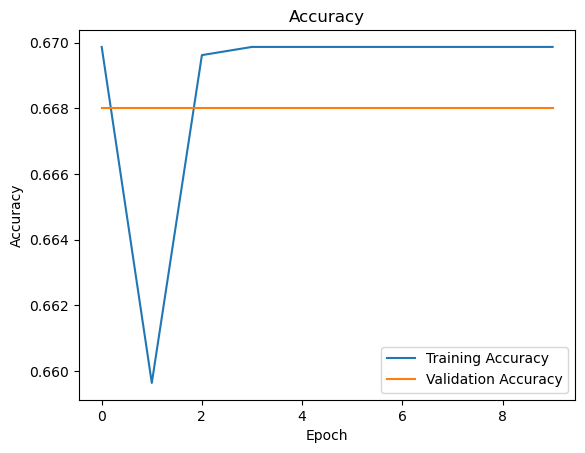

In [19]:
#Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

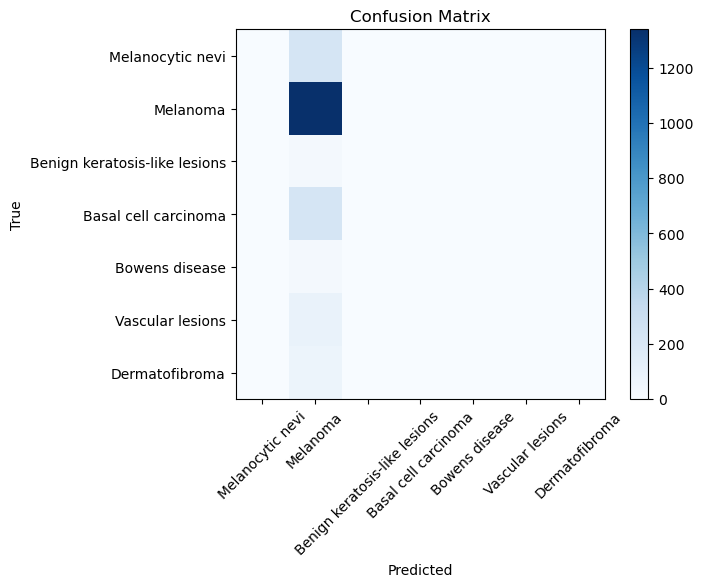

In [18]:
#plot confusion matrix

plt.imshow(confusion_mat, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

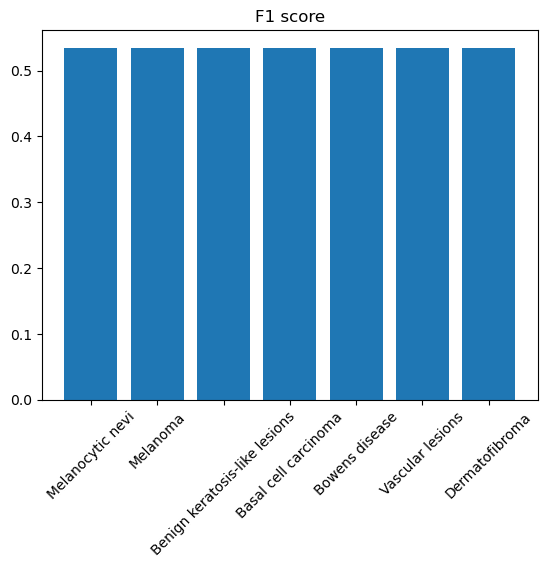

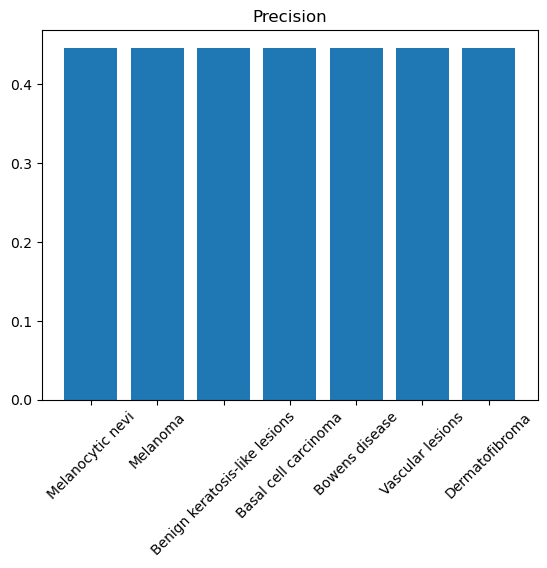

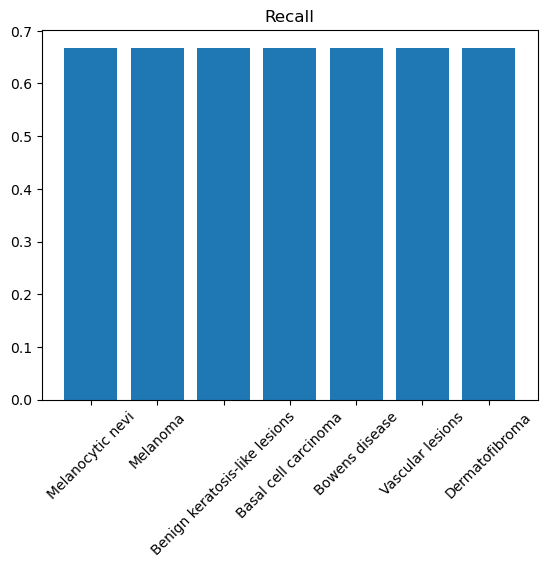

In [17]:
# Plot F1 score, precision, and recall

labels = ['Melanocytic nevi', 'Melanoma', 'Benign keratosis-like lesions', 'Basal cell carcinoma', 'Bowens disease', 'Vascular lesions', 'Dermatofibroma']
metrics = [f1, precision, recall]
metric_names = ['F1 score', 'Precision', 'Recall']
for i, metric in enumerate(metrics):
    plt.bar(labels, metric)
    plt.title(metric_names[i])
    plt.xticks(rotation=45)
    plt.show()

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1321611404418945
Test accuracy: 0.6679980158805847
